## Libraries Imported

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import *

## Data Importing

In [3]:
df=pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1') 
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [6]:
df.drop(columns=["customer name","customer e-mail"],inplace=True) ##Dropping Irrelevant features

In [7]:
df

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [8]:
c=df.columns[2:]
c

Index(['age', 'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

## Data Visualisation

### Hist Plot

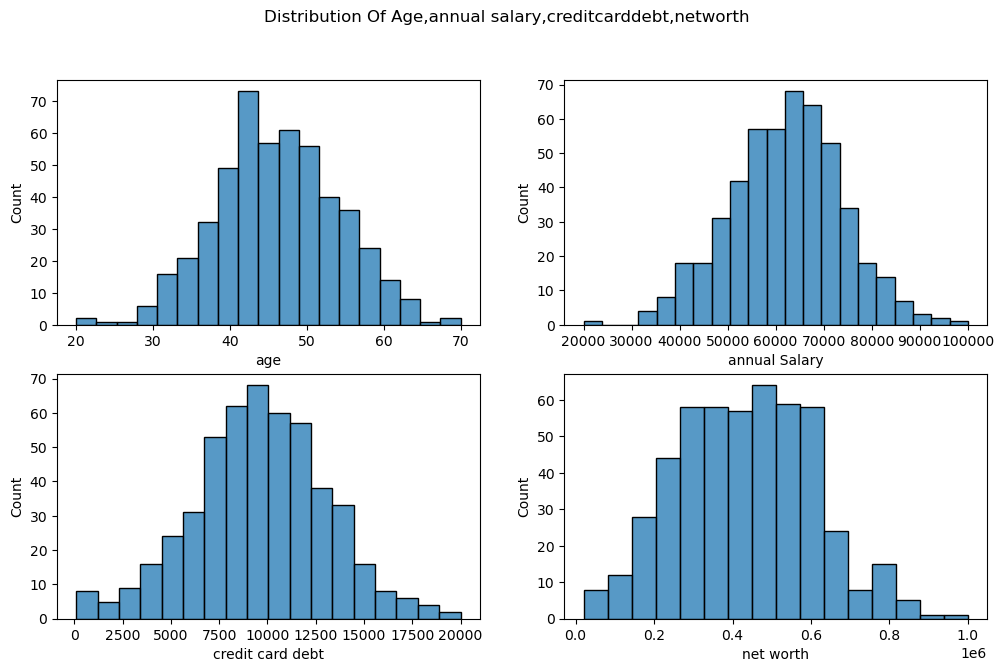

In [9]:
plt.figure(figsize=(12,7)) 
for i in range(len(c[:-1])): 
    plt.subplot(2,2,i+1)
    sns.histplot(data=df,x=c[i]) 
    plt.xlabel(c[i])  
plt.suptitle("Distribution Of Age,annual salary,creditcarddebt,networth")
plt.show()

### Box Plot

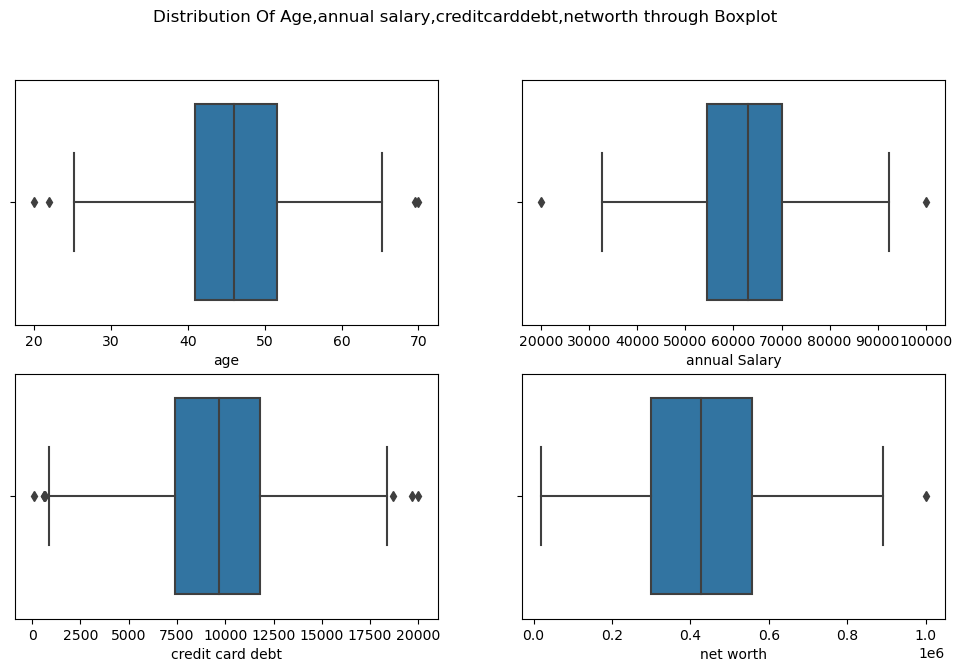

In [10]:
plt.figure(figsize=(12,7)) 
for i in range(len(c[:-1])): 
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,x=c[i]) 
    plt.xlabel(c[i]) 
plt.suptitle("Distribution Of Age,annual salary,creditcarddebt,networth through Boxplot")
plt.show()

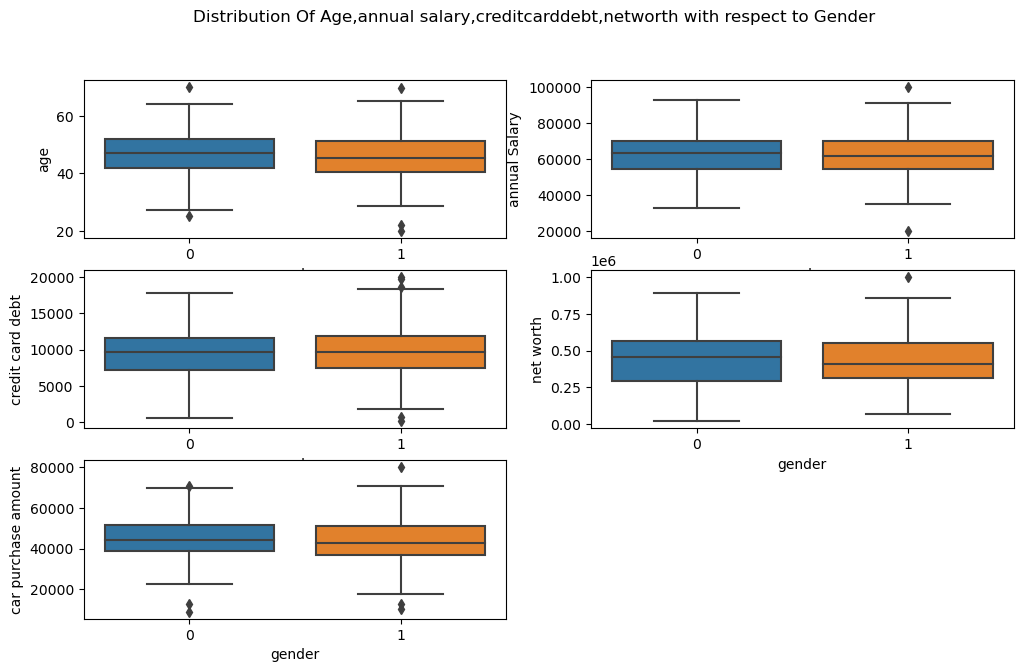

In [28]:
plt.figure(figsize=(12,7)) 
for i in range(len(c)): 
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df,x="gender",y=c[i]) 
    plt.xlabel("gender") 
    plt.ylabel(c[i]) 
plt.suptitle("Distribution Of Age,annual salary,creditcarddebt,networth with respect to Gender")
plt.show()

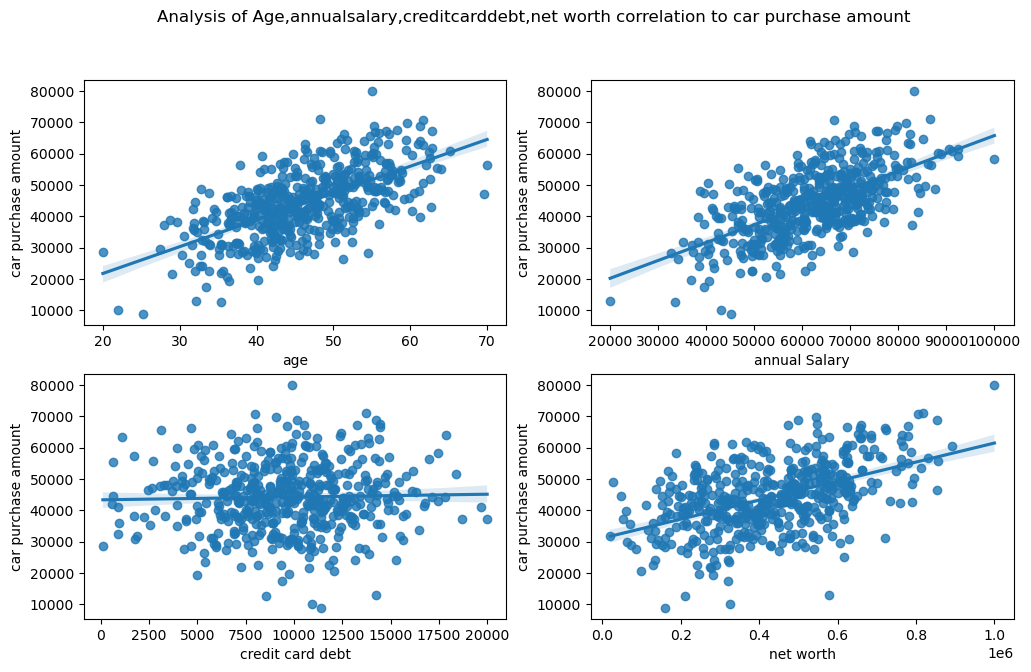

In [12]:
plt.figure(figsize=(12,7)) 
for i in range(len(c[:-1])): 
    plt.subplot(2,2,i+1)
    sns.regplot(data=df,x=c[i],y="car purchase amount") 
    plt.xlabel(c[i])
    plt.ylabel("car purchase amount") 
plt.suptitle("Age,annualsalary,creditcarddebt,net worth correlation to car purchase amount")
plt.show()

## Heat Map

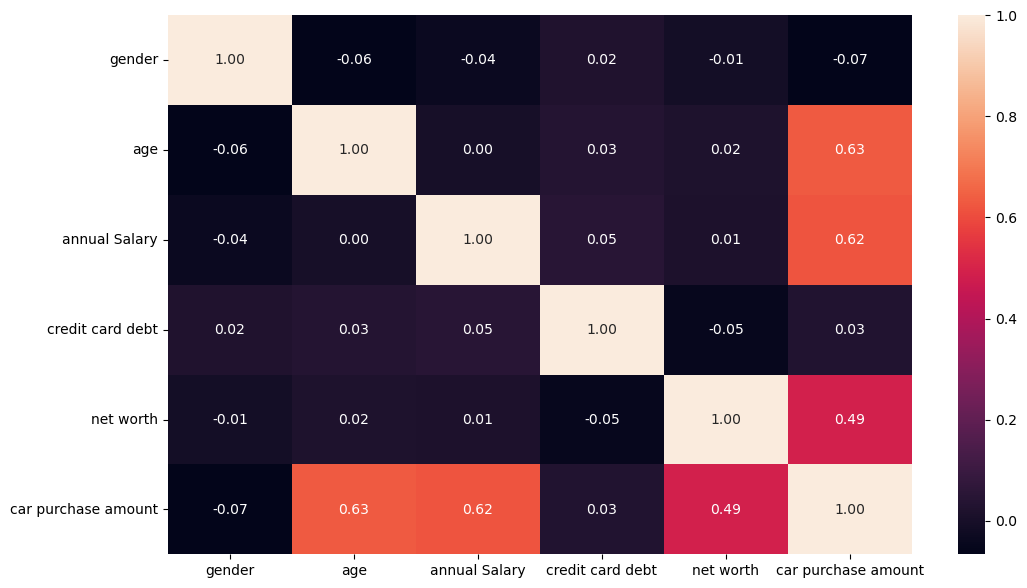

In [13]:
plt.figure(figsize=(12,7)) 
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f") 
plt.show()

## Splitting Into Independent And Dependent

In [14]:
X=df.drop(columns=["car purchase amount","country","gender","credit card debt"]) 
Y=df["car purchase amount"]

In [15]:
X

,age,annual Salary,net worth
0,41.851720,62812.09301,238961.2505
1,40.870623,66646.89292,530973.9078
2,43.152897,53798.55112,638467.1773
3,58.271369,79370.03798,548599.0524
4,57.313749,59729.15130,560304.0671
...,...,...,...
495,41.462515,71942.40291,541670.1016
496,37.642000,56039.49793,360419.0988
497,53.943497,68888.77805,764531.3203
498,59.160509,49811.99062,337826.6382


## Splitting Into Train And Test

In [16]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
Xtrain

,age,annual Salary,net worth
249,36.117247,70334.42787,632600.4718
433,39.814817,56086.45033,228388.5491
19,58.741842,55368.23716,566022.1306
322,60.180119,58837.97088,622324.7499
332,31.244838,41361.95045,615720.0425
...,...,...,...
106,41.796014,51075.46118,450402.2932
270,35.375156,33422.99683,211168.6293
348,45.305941,63561.04525,608019.6308
435,57.974293,41409.29390,421318.9764


## Normalizing of Feature

In [18]:
M=MinMaxScaler()
M.fit(Xtrain)
Xtrain.iloc[:,:]=M.transform(Xtrain.iloc[:,:])
Xtest.iloc[:,:]=M.transform(Xtest.iloc[:,:]) 

## Model Building

### LinearRegression

In [19]:
Lr=LinearRegression()
Lr.fit(Xtrain,Ytrain) 
ypred=Lr.predict(Xtest)

In [20]:
meanabsoluterror=mean_absolute_error(Ytest,ypred)
r2score=r2_score(Ytest,ypred)
rootmeansquarerror=np.sqrt(mean_squared_error(Ytest,ypred))

In [21]:
metrics=pd.DataFrame({"Metrics":[meanabsoluterror,r2score,rootmeansquarerror]}, 
                 index=["meanabsoluterror","r2score","rootmeansquarerror"]) 
metrics

,Metrics
meanabsoluterror,1.147416
r2score,1.000000
rootmeansquarerror,1.431273


### DecisionTreeReressor

In [22]:
dt=DecisionTreeRegressor(criterion="squared_error",min_samples_split=5) 
dt.fit(Xtrain,Ytrain) 
ypred=dt.predict(Xtest)

In [23]:
meanabsoluterror=mean_absolute_error(Ytest,ypred)
r2score=r2_score(Ytest,ypred)
rootmeansquarerror=np.sqrt(mean_squared_error(Ytest,ypred))

In [24]:
metrics=pd.DataFrame({"Metrics":[meanabsoluterror,r2score,rootmeansquarerror]}, 
                 index=["meanabsoluterror","r2score","rootmeansquarerror"]) 
metrics

,Metrics
meanabsoluterror,2529.419697
r2score,0.902907
rootmeansquarerror,3237.815415


### RandomForestRegressor

In [25]:
rf=RandomForestRegressor(min_samples_split=5) 
rf.fit(Xtrain,Ytrain) 
ypred=rf.predict(Xtest)

In [26]:
meanabsoluterror=mean_absolute_error(Ytest,ypred)
r2score=r2_score(Ytest,ypred)
rootmeansquarerror=np.sqrt(mean_squared_error(Ytest,ypred))

In [27]:
metrics=pd.DataFrame({"Metrics":[meanabsoluterror,r2score,rootmeansquarerror]}, 
                 index=["meanabsoluterror","r2score","rootmeansquarerror"]) 
metrics

,Metrics
meanabsoluterror,1513.227769
r2score,0.958329
rootmeansquarerror,2121.176241
